In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the CSV files into data-frames
question_details = pd.read_csv("question_details.csv")
question_interactions = pd.read_csv("question_interactions.csv")
user_assessment_sessions = pd.read_csv("user_assessment_sessions.csv")
user_interactions = pd.read_csv("user_interactions.csv")

## 1. Describe and visualize how the distributions of user and question rankings compare and relate between assessments.

In [3]:
user_rankings = user_interactions[["ranking","rd","assessment_item_id"]]
question_rankings = question_interactions[["ranking","rd","assessment_item_id"]]

In [4]:
user_rankings = user_rankings.rename(columns={"ranking":"user_ranking","rd":"user_rd"})
question_rankings = question_rankings.rename(columns={"ranking":"question_ranking","rd":"question_rd"})

In [5]:
merged_rankings = pd.merge(left = user_rankings, right = question_rankings, left_on = "assessment_item_id", right_on = "assessment_item_id")

In [6]:
merged_rankings.head()

,user_ranking,user_rd,assessment_item_id,question_ranking,question_rd
0,1430.45,101.869,163839,1384.09,30.0
1,1430.45,101.869,163839,1383.11,30.0
2,1430.45,101.869,163839,1376.07,30.0
3,1430.45,101.869,163839,1371.30,30.0
4,1430.45,101.869,163839,1357.77,30.0


In [7]:
#Correlation Matrix
corr = merged_rankings.corr()
corr

,user_ranking,user_rd,assessment_item_id,question_ranking,question_rd
user_ranking,1.000000,0.026973,0.139721,0.842354,0.014331
user_rd,0.026973,1.000000,0.020991,0.116050,-0.002320
assessment_item_id,0.139721,0.020991,1.000000,0.145422,-0.001262
question_ranking,0.842354,0.116050,0.145422,1.000000,0.018167
question_rd,0.014331,-0.002320,-0.001262,0.018167,1.000000


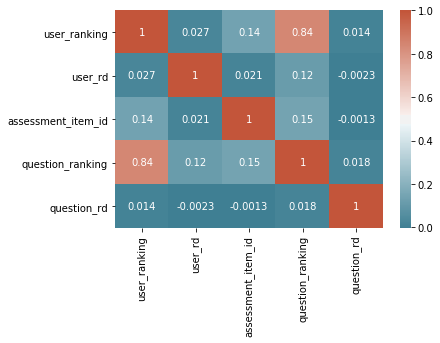

In [8]:
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### As we can see from the correlation matrix, there exists a correlation coefficient of +0.84 between user_ranking & question_ranking. This indicates that there is strongpositive correlation between these 2 factors.

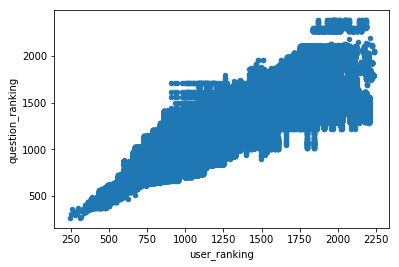

In [9]:
# Scatterplot
merged_rankings.plot(kind='scatter', x='user_ranking', y='question_ranking')

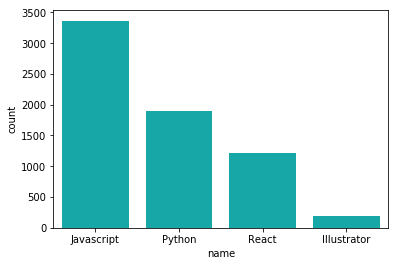

In [10]:
sns.countplot(x="name", data=user_assessment_sessions, color="c")

## 2. How does it appear the algorithm determines when a user’s assessment session is complete?

In [11]:
ID_1080035 = user_interactions.loc[user_interactions['user_assessment_session_id']==1080035]
ID_1080035.sort_values(by='rd',ascending=False)

,user_interaction_id,user_assessment_session_id,assessment_item_id,ranking,rd,display_score,percentile,date_created
25984,13176684,1080035,163822,943.825,248.1120,116,0.281984,2017-06-01 00:05:52
3,13176685,1080035,165939,1030.980,204.8380,131,0.373125,2017-06-01 00:06:03
4,13176687,1080035,163920,1129.540,176.8830,148,0.485214,2017-06-01 00:06:17
25976,13176689,1080035,163904,1186.110,158.5220,158,0.550685,2017-06-01 00:06:26
52041,13176691,1080035,166718,1251.470,144.4390,169,0.624530,2017-06-01 00:06:37
11,13176693,1080035,163788,1298.950,133.5090,177,0.675598,2017-06-01 00:06:50
25985,13176696,1080035,166727,1337.090,124.8670,184,0.714404,2017-06-01 00:07:11
77959,13176697,1080035,163931,1375.760,117.5730,190,0.751342,2017-06-01 00:07:18
77956,13176699,1080035,163853,1408.040,111.4700,196,0.780107,2017-06-01 00:07:30
25977,13176705,1080035,166716,1436.770,106.2470,201,0.804020,2017-06-01 00:07:47


In [12]:
ID_1080045 = user_interactions.loc[user_interactions['user_assessment_session_id']==1080045]
ID_1080045.sort_values(by='rd',ascending=False)

,user_interaction_id,user_assessment_session_id,assessment_item_id,ranking,rd,display_score,percentile,date_created
52034,13176809,1080045,163901,1315.59,247.1410,180,0.692795,2017-06-01 00:13:57
77957,13176814,1080045,163916,1420.36,202.0610,198,0.790559,2017-06-01 00:14:18
52035,13176817,1080045,166720,1326.57,174.9730,182,0.703921,2017-06-01 00:14:35
25987,13176819,1080045,163930,1401.09,156.4770,194,0.774086,2017-06-01 00:14:50
52036,13176821,1080045,166716,1337.65,142.8690,184,0.714963,2017-06-01 00:15:10
7,13176826,1080045,163755,1394.56,132.3880,193,0.768335,2017-06-01 00:15:43
5,13176829,1080045,163894,1440.89,123.8050,201,0.807320,2017-06-01 00:15:56
12,13176834,1080045,163853,1390.77,117.1740,193,0.764960,2017-06-01 00:16:12
77963,13176838,1080045,164699,1432.33,111.2470,200,0.800432,2017-06-01 00:16:23
25982,13176845,1080045,166747,1468.92,106.0810,206,0.828827,2017-06-01 00:16:39


## 3. Which of the assessments has the highest and lowest dropout rates, respectively?

To be honest, I didn’t fully understand the context of this question. To be precise, I couldn’t figure out what exactly “dropout rate” meant. 
Based on my understanding, I have shown visualisations regarding the frequency/total count of the course names. From the results I can infer that the most popular course is Javascript and the least attempted course is that of Illustrator.
I guess based on these frequencies and preferences, users might not be very fond of the Illustrator course, and hence, it may result in the highest dropout rate in this course. The reverse can be the case for the Javascript course whose assessments might have a very low dropout rate.
Figuring out dropout rates for  individual assessments seemed a bit confusing for me. I couldn’t figure out which column/criterion should I consider for calculating the dropout rate. My initial assumptions were based on subsetting and sorting the dataset on the basis of “percentile” column.


## 5. Identify a metric that could be used to identify questions that might need to be reviewed, changed, or removed. (This is an open-ended question. You may describe your approach and/or demonstrate it with data.)

In [13]:
question_interactions.head()

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
0,13176707,1080035,165951,2776,Incorrect,1480.110,30.0,2017-06-01 00:07:48,7326.0
1,13176733,1080035,166720,3270,Incorrect,1412.420,30.0,2017-06-01 00:09:08,11600.0
2,13177124,1080063,163805,1082,Correct,884.989,30.0,2017-06-01 00:39:11,8767.0
3,13177134,1080063,163842,517884,Correct,851.891,30.0,2017-06-01 00:39:48,46605.0
4,13177106,1080063,163790,1067,Correct,952.673,30.0,2017-06-01 00:37:59,11929.0


In [14]:
question_interactions.sort_values(by = "client_elapsed_time",ascending = True)

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
13799,13622275,1115116,170430,4745,Incorrect,1199.320,30.0,2017-06-16 16:55:45,-5.871476e+07
13947,13622269,1115116,170442,490278,Incorrect,1290.370,30.0,2017-06-16 16:55:37,-5.871321e+07
66013,13622349,1115116,170402,490210,Incorrect,1127.280,30.0,2017-06-16 16:57:41,-5.871158e+07
65904,13622266,1115116,170291,490104,Incorrect,1239.780,30.0,2017-06-16 16:55:25,-5.871018e+07
13859,13622247,1115116,170529,4844,Incorrect,1364.320,30.0,2017-06-16 16:54:49,-5.870994e+07
39677,13622187,1115116,170374,490152,Incorrect,1599.680,30.0,2017-06-16 16:53:00,-5.870986e+07
39572,13622342,1115116,170279,490100,Incorrect,1107.150,30.0,2017-06-16 16:57:30,-5.870965e+07
13988,13622194,1115116,170363,490070,Incorrect,1520.230,30.0,2017-06-16 16:53:13,-5.870868e+07
13858,13622324,1115116,170275,4590,Correct,1162.370,30.0,2017-06-16 16:57:01,-5.870750e+07
39665,13622183,1115116,170463,4778,Correct,1445.050,30.0,2017-06-16 16:52:46,-5.870713e+07


In [15]:
correct_question =  question_interactions['result']=='Correct'
questions_correct = question_interactions[correct_question]

In [16]:
questions_correct.head()

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
2,13177124,1080063,163805,1082,Correct,884.989,30.0,2017-06-01 00:39:11,8767.0
3,13177134,1080063,163842,517884,Correct,851.891,30.0,2017-06-01 00:39:48,46605.0
4,13177106,1080063,163790,1067,Correct,952.673,30.0,2017-06-01 00:37:59,11929.0
8,13177459,1080095,163758,492656,Correct,1091.700,30.0,2017-06-01 01:06:31,35295.0
9,13177355,1080080,166723,3273,Correct,746.088,30.0,2017-06-01 00:55:46,24753.0


In [17]:
sorted_questions = questions_correct.sort_values(by = 'client_elapsed_time', ascending = True)
sorted_questions.head()

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
13858,13622324,1115116,170275,4590,Correct,1162.37,30.0,2017-06-16 16:57:01,-58707501.0
39665,13622183,1115116,170463,4778,Correct,1445.05,30.0,2017-06-16 16:52:46,-58707128.0
13802,13622222,1115116,170555,490217,Correct,1260.44,30.0,2017-06-16 16:54:03,-58703474.0
39664,13622237,1115116,170634,489688,Correct,1310.99,30.0,2017-06-16 16:54:20,-58696361.0
65936,13622293,1115116,170544,490216,Correct,1132.63,30.0,2017-06-16 16:55:53,-58694219.0


In [20]:
sorted_questions.sort_values(by = 'ranking',ascending=True)

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
37158,13199915,1081837,166745,3289,Correct,262.922,30.0000,2017-06-01 17:51:56,9013.0
54178,13199924,1081837,163861,1138,Correct,319.879,30.0000,2017-06-01 17:52:11,10047.0
80290,13199932,1081837,163860,1137,Correct,329.810,30.0000,2017-06-01 17:52:25,5462.0
83750,13199939,1081837,164669,493775,Correct,353.195,30.0000,2017-06-01 17:52:35,3354.0
53848,13194897,1081448,166749,3293,Correct,362.341,30.0000,2017-06-01 15:05:32,2854.0
89263,13381552,1095987,163899,1175,Correct,362.788,30.0000,2017-06-08 08:22:28,15221.0
27330,13194904,1081448,166725,3275,Correct,366.264,30.0000,2017-06-01 15:05:45,11754.0
52629,13199943,1081837,163944,493790,Correct,369.498,30.0000,2017-06-01 17:52:42,3041.0
2320,13242470,1085208,163794,1071,Correct,369.625,30.0000,2017-06-03 08:12:10,9174.0
25841,13344423,1093104,163818,511027,Correct,370.391,30.0000,2017-06-07 04:37:24,1782.0


## 4. Is there significant variance in question difficulty (ranking) by question topic within a given assessment?

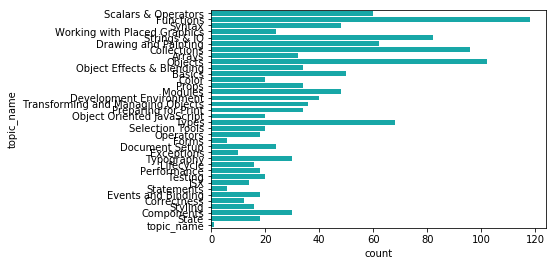

In [21]:
sns.countplot(y="topic_name", data=question_details, color="c");

In [23]:
question_interactions.head()

,user_interaction_id,user_assessment_session_id,assessment_item_id,item_content_id,result,ranking,rd,date_created,client_elapsed_time
0,13176707,1080035,165951,2776,Incorrect,1480.110,30.0,2017-06-01 00:07:48,7326.0
1,13176733,1080035,166720,3270,Incorrect,1412.420,30.0,2017-06-01 00:09:08,11600.0
2,13177124,1080063,163805,1082,Correct,884.989,30.0,2017-06-01 00:39:11,8767.0
3,13177134,1080063,163842,517884,Correct,851.891,30.0,2017-06-01 00:39:48,46605.0
4,13177106,1080063,163790,1067,Correct,952.673,30.0,2017-06-01 00:37:59,11929.0


In [22]:
question_interactions.rd.var()

168.18973045538354

In [40]:
question_interactions.ranking.var()

71411.51681108002

In [24]:
question_interactions.rd.mean()

31.3812480378864

In [25]:
question_interactions.rd.median()

30.0

In [41]:
question_interactions.ranking.mean()

1222.8139485167646

In [42]:
question_interactions.ranking.median()

1222.92

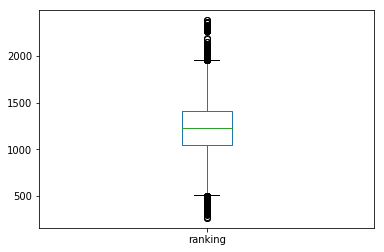

In [36]:
# Boxplot
question_interactions.plot(kind='box', x='rd', y='ranking')

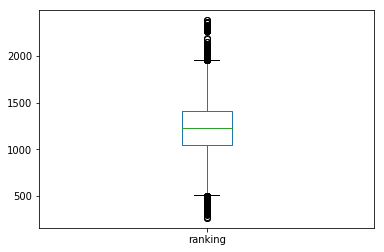

In [37]:
# Boxplot
question_interactions.plot(kind='box', x='assessment_item_id', y='ranking')

In [38]:
Q1 = question_interactions.quantile(0.25)
Q3 = question_interactions.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

user_interaction_id           418043.000
user_assessment_session_id     33390.000
assessment_item_id              6667.000
item_content_id               493069.000
ranking                          364.065
rd                                 0.000
client_elapsed_time            14400.500
dtype: float64


In [1]:
str1 = '{2}, {1} and {0}'.format(0, 1, 2)
str2 = '{0}{1}{0}'.format('abra', 'cad')
print(str1 + " ,and " + str2)

2, 1 and 0 ,and abracadabra
